### Target:
- Adding learning rate schedulers for better results.
- To achive the desired accuracy consistantly in atlest 3 epochs

### Results:

- Model Parameters : 7,496
- Best Training accuracy : 99.42
- Best Training loss : 0.0211 
- Best Testing accuracy : 99.53
- Best Testing loss : 0.0174

### Analysis:

- I tried different learning rate schedulers like ReduceLRPlatue which did not work because on platue decreses the learning rate when loss is incresing in a particular epochs but this did not happen in out problem. StepLR also did not work because it is hard to predict at which point the learning rate should be reduced.

- So, I have used OneCycleLR which updates learning rate throughout the epoch with every single batch is passed (Learning rate is updated in a particular range)

- As I can see the model is underfit in the first epoch but start getting better by the second epoch.

- I can see some ups and downs in the accuracy while training, but in the end I are able to achive the desired result.

- I can see the accuracy of more than 99.4 in last five epochs (Form 11 to 15)


<img src="./images/stopplayinggod.jpg" width="550" class="center">


In [1]:
import torch
from torchvision import transforms

import torch.optim as optim

from model import Net2, modelsummary
from utils import build_mnist, Trainer, plot_sampledata, evaluate_model

In [2]:
# CUDA?
torch.manual_seed(1)
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [3]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        # transforms.RandomApply(
        #     [
        #         transforms.CenterCrop(22),
        #     ],
        #     p=0.1,
        # ),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        transforms.RandomRotation((-5.0, 5.0), fill=(0.1307,)),
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [4]:
batch_size = 128

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(
    set="train", transforms=train_transforms, **kwargs
)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 156910792.58it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 113849336.30it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33896277.51it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 1961545.38it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



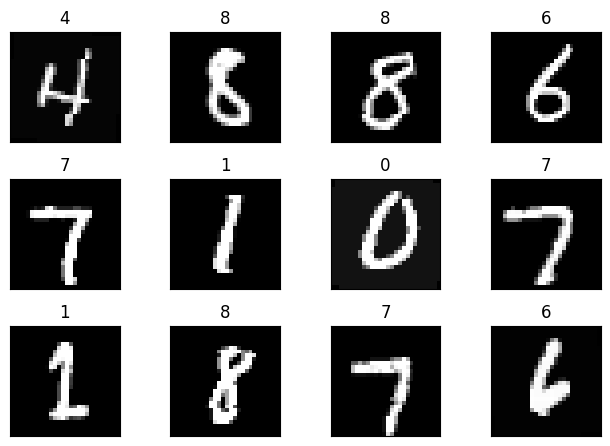

In [5]:
plot_sampledata(train_loader)

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net2().to(device)
modelsummary(model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
           Conv2d-13           [-1, 12, 10, 10]             864
             ReLU-14           [-1, 12,

In [12]:
num_epochs = 15
model = Net2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)  # large learning rate
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=num_epochs, steps_per_epoch=len(train_loader))

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=0.1293 Batch_id=468 Accuracy=80.89: 100%|██████████| 469/469 [00:37<00:00, 12.36it/s]


Test set: Average loss: 0.1201, Accuracy: 9727/10000 (97.27%)

Epoch 2


Train: Loss=0.0514 Batch_id=468 Accuracy=96.77: 100%|██████████| 469/469 [00:38<00:00, 12.26it/s]


Test set: Average loss: 0.0631, Accuracy: 9819/10000 (98.19%)

Epoch 3


Train: Loss=0.0652 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:38<00:00, 12.28it/s]


Test set: Average loss: 0.0387, Accuracy: 9885/10000 (98.85%)

Epoch 4


Train: Loss=0.0647 Batch_id=468 Accuracy=98.18: 100%|██████████| 469/469 [00:37<00:00, 12.47it/s]


Test set: Average loss: 0.0311, Accuracy: 9897/10000 (98.97%)

Epoch 5


Train: Loss=0.0878 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:39<00:00, 11.92it/s]


Test set: Average loss: 0.0331, Accuracy: 9905/10000 (99.05%)

Epoch 6


Train: Loss=0.0864 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:38<00:00, 12.21it/s]


Test set: Average loss: 0.0274, Accuracy: 9921/10000 (99.21%)

Epoch 7


Train: Loss=0.0709 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:38<00:00, 12.18it/s]


Test set: Average loss: 0.0256, Accuracy: 9926/10000 (99.26%)

Epoch 8


Train: Loss=0.0346 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:38<00:00, 12.30it/s]


Test set: Average loss: 0.0252, Accuracy: 9922/10000 (99.22%)

Epoch 9


Train: Loss=0.0301 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:38<00:00, 12.24it/s]


Test set: Average loss: 0.0237, Accuracy: 9923/10000 (99.23%)

Epoch 10


Train: Loss=0.1060 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:38<00:00, 12.33it/s]


Test set: Average loss: 0.0220, Accuracy: 9934/10000 (99.34%)

Epoch 11


Train: Loss=0.0260 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:38<00:00, 12.29it/s]


Test set: Average loss: 0.0206, Accuracy: 9947/10000 (99.47%)

Epoch 12


Train: Loss=0.0091 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:39<00:00, 11.82it/s]


Test set: Average loss: 0.0175, Accuracy: 9950/10000 (99.50%)

Epoch 13


Train: Loss=0.0203 Batch_id=468 Accuracy=99.37: 100%|██████████| 469/469 [00:38<00:00, 12.28it/s]


Test set: Average loss: 0.0183, Accuracy: 9948/10000 (99.48%)

Epoch 14


Train: Loss=0.0071 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:38<00:00, 12.24it/s]


Test set: Average loss: 0.0171, Accuracy: 9952/10000 (99.52%)

Epoch 15


Train: Loss=0.0211 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:38<00:00, 12.22it/s]


Test set: Average loss: 0.0174, Accuracy: 9953/10000 (99.53%)



Set	 Max Acc@Epoch	 Last Epoch Acc
train	 99.42@15		99.42
test	 99.53@15		99.53


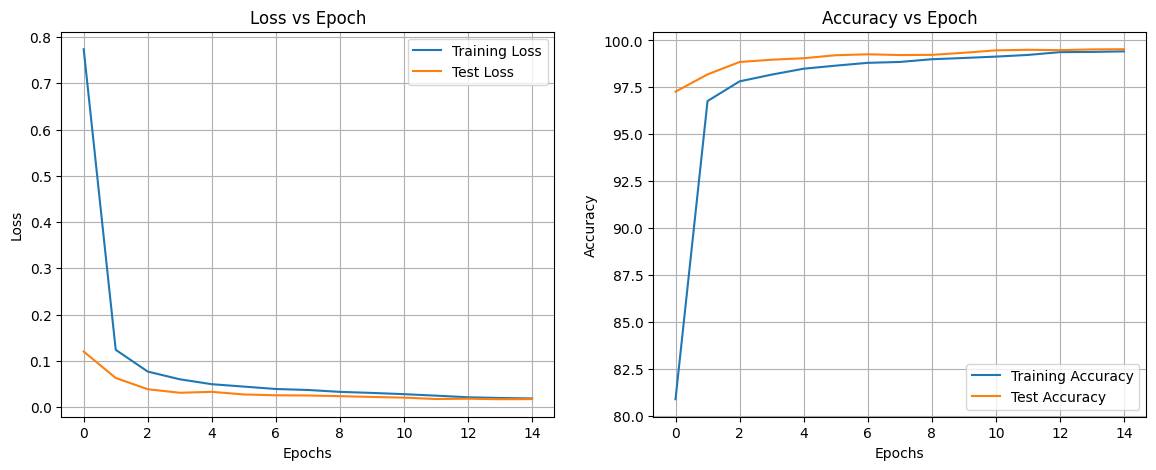

In [13]:
trainer.plot_history()

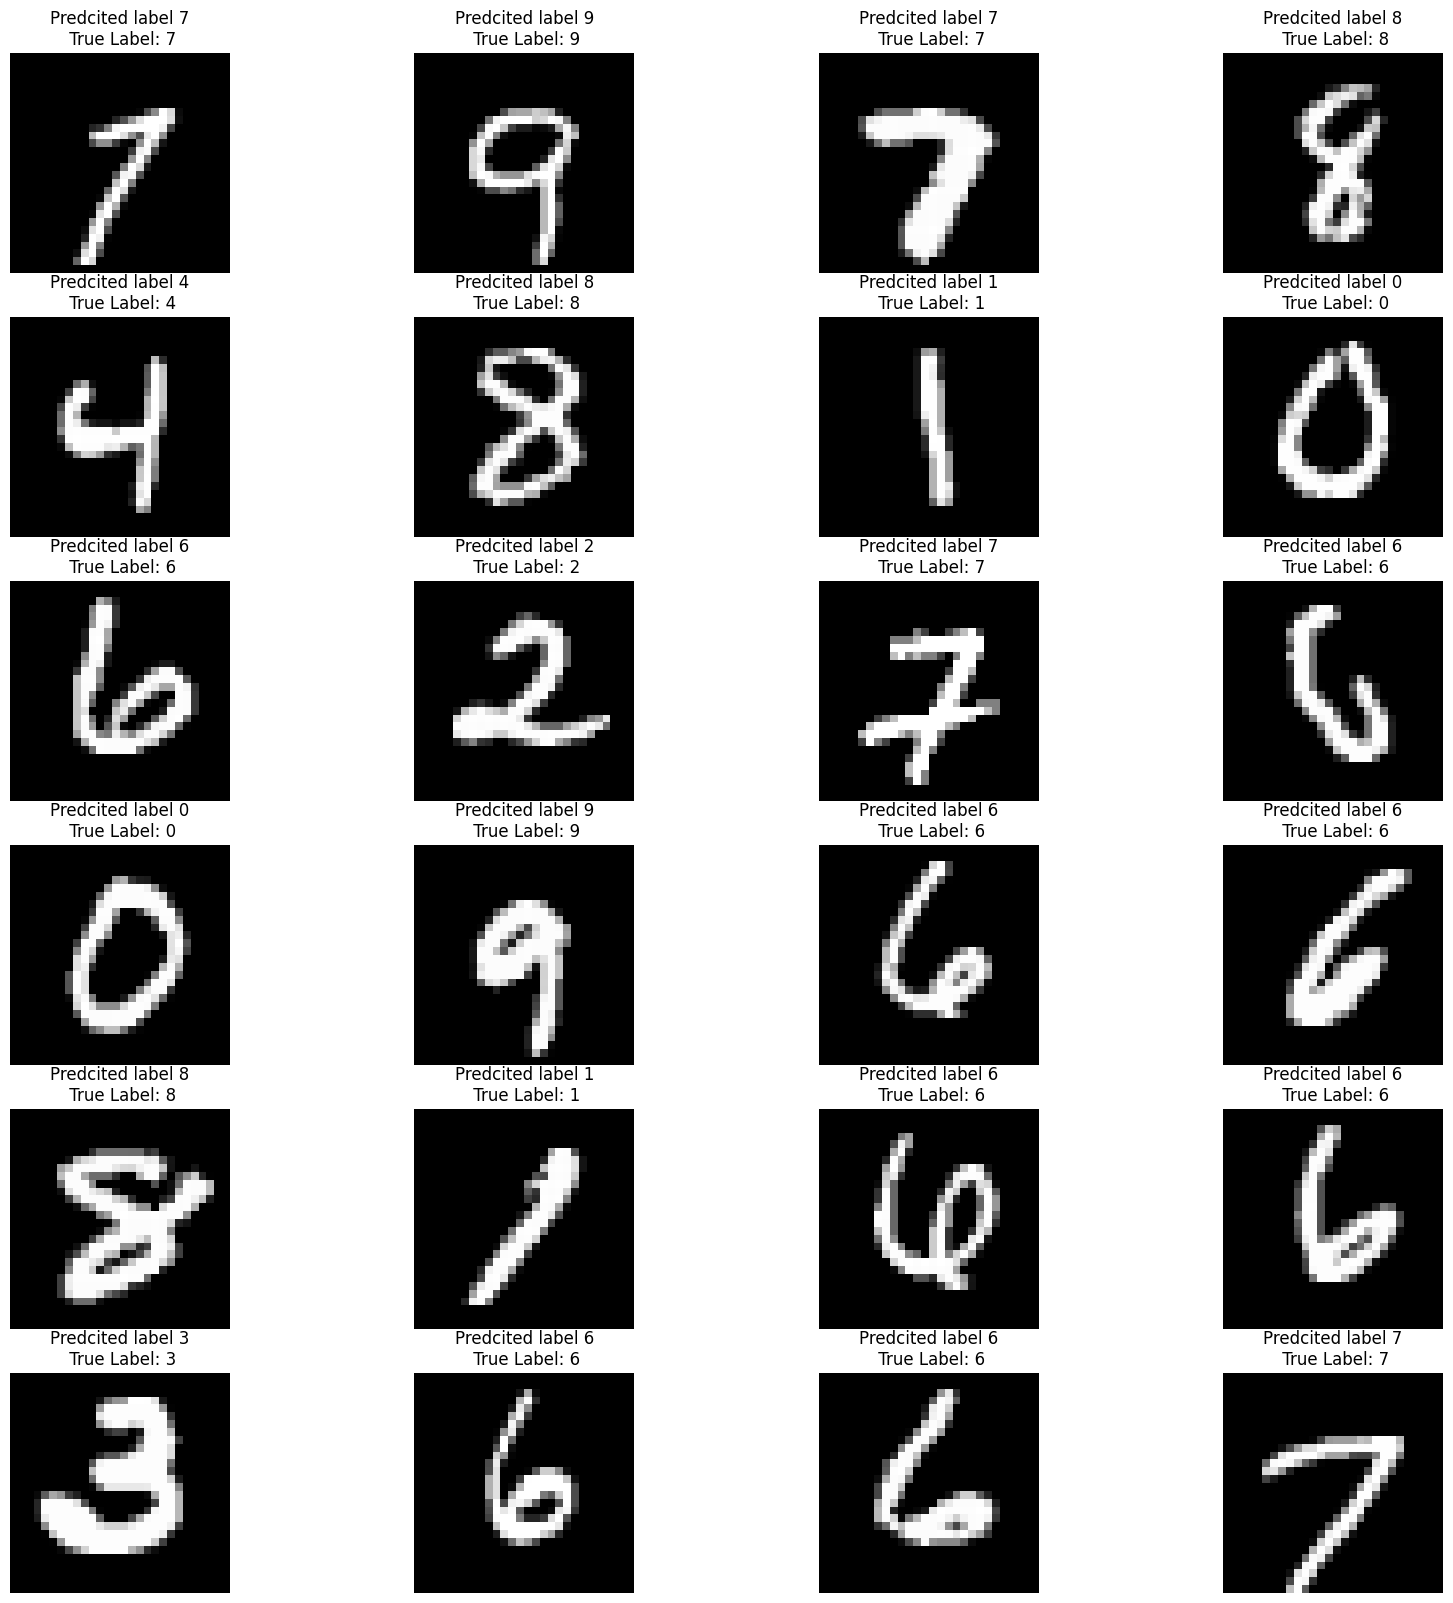

In [14]:
evaluate_model(trainer.model, test_loader, device)